# SVM para problemas de regresión

$$loss = \frac{1}{n}\sum_{i=1}^n\max(0,|y_i-(Ax_i+b)|-\varepsilon)$$

- $\varepsilon$: la mitad del margen, que fuerza a que la función loss sea cero para todos los puntos dentro del corredor

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [3]:
session = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

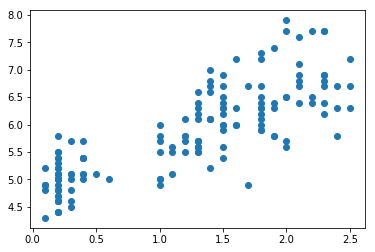

In [6]:
plt.plot(x_vals, y_vals, 'o')
plt.show()

In [7]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [8]:
batch_size = 50

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [10]:
model_output = tf.add(tf.matmul(x_data,A), b)

In [11]:
epsilon = tf.constant([0.5])
loss = tf.reduce_mean(tf.maximum(0.0, tf.subtract(tf.abs(tf.subtract(model_output, y_target)), epsilon)))

In [12]:
my_optim = tf.train.GradientDescentOptimizer(0.05)
train_step = my_optim.minimize(loss)

init = tf.global_variables_initializer()
session.run(init)

In [13]:
train_loss = []
test_loss = []

for i in range(300):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    train_loss_temp = session.run(loss, feed_dict = {x_data: np.transpose([x_vals_train]),
                                                     y_target: np.transpose([y_vals_train])})
    train_loss.append(train_loss_temp)
    
    test_loss_temp = session.run(loss, feed_dict= {x_data: np.transpose([x_vals_test]),
                                                   y_target: np.transpose([y_vals_test])})
    test_loss.append(test_loss_temp)
    
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+", b = "+str(session.run(b)))
        print("Loss Train = "+str(train_loss_temp)+ ", Loss Test = "+str(test_loss_temp))

Paso #50, A = [[2.3273182]], b = [[2.5346391]]
Loss Train = 0.6311793, Loss Test = 0.70775723
Paso #100, A = [[1.9255189]], b = [[3.185639]]
Loss Train = 0.39763594, Loss Test = 0.4723894
Paso #150, A = [[1.5775189]], b = [[3.7896392]]
Loss Train = 0.20149627, Loss Test = 0.2783744
Paso #200, A = [[1.3299192]], b = [[4.209638]]
Loss Train = 0.10815693, Loss Test = 0.18329237
Paso #250, A = [[1.2221191]], b = [[4.408638]]
Loss Train = 0.08574666, Loss Test = 0.1606318
Paso #300, A = [[1.1033192]], b = [[4.5156384]]
Loss Train = 0.07541003, Loss Test = 0.1375042


In [14]:
[[slope]] = session.run(A)
[[y_intercept]] = session.run(b)
[width] = session.run(epsilon)

best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
    best_fit_upper.append(slope*i+y_intercept+width)
    best_fit_lower.append(slope*i+y_intercept-width)

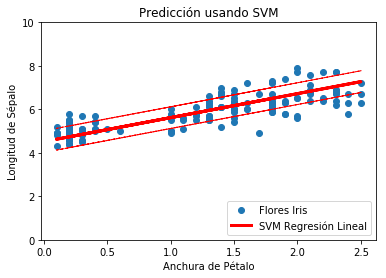

In [16]:
plt.plot(x_vals, y_vals, 'o', label = "Flores Iris")
plt.plot(x_vals, best_fit, 'r-', label = "SVM Regresión Lineal", linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=1)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=1)
plt.ylim([0,10])
plt.legend(loc="lower right")
plt.xlabel("Anchura de Pétalo")
plt.ylabel("Longitud de Sépalo")
plt.title("Predicción usando SVM")
plt.show()

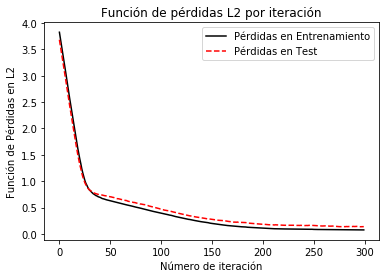

In [17]:
plt.plot(train_loss, 'k-', label = "Pérdidas en Entrenamiento")
plt.plot(test_loss, 'r--', label = "Pérdidas en Test")
plt.title("Función de pérdidas L2 por iteración")
plt.xlabel("Número de iteración")
plt.ylabel("Función de Pérdidas en L2")
plt.legend(loc="upper right")
plt.show()